# Chapter 4: Linear Regression

## 4.3 Building Simple Linear Regression Model

In [273]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

np.set_printoptions(precision=4, linewidth=100)

In [274]:
mba_salary_df = pd.read_csv( 'https://raw.githubusercontent.com/manaranjanp/IIMBClasses/main/regression/MBA_Salary.csv' )
mba_salary_df.head( 10 )

,S. No.,Percentage in Grade 10,Salary
0,1,62.00,270000
1,2,76.33,200000
2,3,72.00,240000
3,4,60.00,250000
4,5,61.00,180000
5,6,55.00,300000
6,7,70.00,260000
7,8,68.00,235000
8,9,82.80,425000
9,10,59.00,240000


In [275]:
type(mba_salary_df)

pandas.core.frame.DataFrame

#### More information about the dataset

In [276]:
mba_salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   S. No.                  50 non-null     int64  
 1   Percentage in Grade 10  50 non-null     float64
 2   Salary                  50 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 1.3 KB


### 4.3.1 Creating Feature Set(X) and Outcome Variable(Y)

In [277]:
import statsmodels.api as sm

X = sm.add_constant( mba_salary_df['Percentage in Grade 10'] )
X.head(5)

,const,Percentage in Grade 10
0,1.0,62.00
1,1.0,76.33
2,1.0,72.00
3,1.0,60.00
4,1.0,61.00


In [278]:
Y = mba_salary_df['Salary']

### 4.3.2 Splitting the dataset into training and validation sets

In [279]:
from sklearn.model_selection import train_test_split

In [280]:
train_X, test_X, train_y, test_y = train_test_split( X ,
                                                     Y,
                                                    train_size = 0.8,
                                                    random_state = 100 )

In [281]:
train_X[0:10]

,const,Percentage in Grade 10
0,1.0,62.00
11,1.0,60.00
18,1.0,70.00
45,1.0,57.58
38,1.0,54.00
25,1.0,64.60
26,1.0,50.00
35,1.0,56.00
17,1.0,68.40
7,1.0,68.00


### 4.3.3 Fitting the Model

In [282]:
mba_salary_lm = sm.OLS( train_y, train_X ).fit()

#### 4.3.3.1 Printing Estimated Parameters and interpreting them

In [283]:
print( mba_salary_lm.params )

const                     30587.285652
Percentage in Grade 10     3560.587383
dtype: float64


## 4.4 Model Diagnostics

In [284]:
mba_salary_lm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Ordinary least squares
===================================================================================
Model:                    OLS                   Adj. R-squared:          0.190     
Dependent Variable:       Salary                AIC:                     1008.8680 
Date:                     2023-05-22 09:44      BIC:                     1012.2458 
No. Observations:         40                    Log-Likelihood:          -502.43   
Df Model:                 1                     F-statistic:             10.16     
Df Residuals:             38                    Prob (F-statistic):      0.00287   
R-squared:                0.211                 Scale:                   5.0121e+09
-----------------------------------------------------------------------------------
                         Coef.     Std.Err.    t    P>|t|     [0.025       0.975]  
-----------------------------------------------------------------------------------
const                  30587.2857 71869.4497 0.4256 0.6728 -114904.8089 176079.3802
Percentage in Grade 10  3560.5874  1116.9258 3.1878 0.0029    1299.4892   5821.6855
-----------------------------------------------------------------------------------
Omnibus:                    2.048              Durbin-Watson:                 2.611
Prob(Omnibus):              0.359              Jarque-Bera (JB):              1.724
Skew:                       0.369              Prob(JB):                      0.422
Kurtosis:                   2.300              Condition No.:                 413  
===================================================================================

"""

#### 4.4.5 Residual Anlalysis

#### 4.4.5.1 Checking Normality

In [285]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

#### 4.4.5.2 Test of Homoscedasticity

In [286]:
def get_standardized_values( vals ):    
    return (vals - vals.mean())/vals.std()

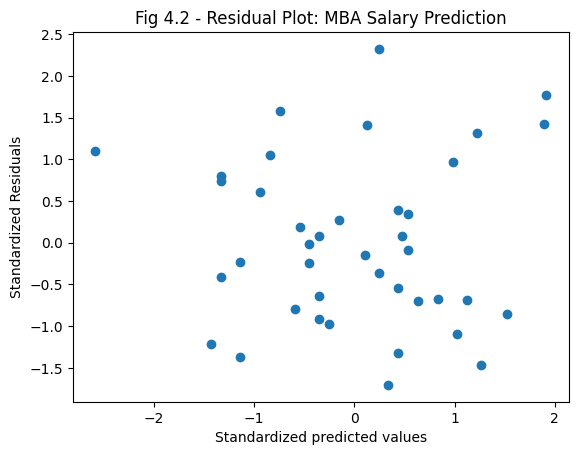

In [287]:
plt.scatter( get_standardized_values( mba_salary_lm.fittedvalues ), 
            get_standardized_values( mba_salary_lm.resid ) )
plt.title( "Fig 4.2 - Residual Plot: MBA Salary Prediction" );
plt.xlabel( "Standardized predicted values")
plt.ylabel( "Standardized Residuals");

<Figure size 800x600 with 0 Axes>

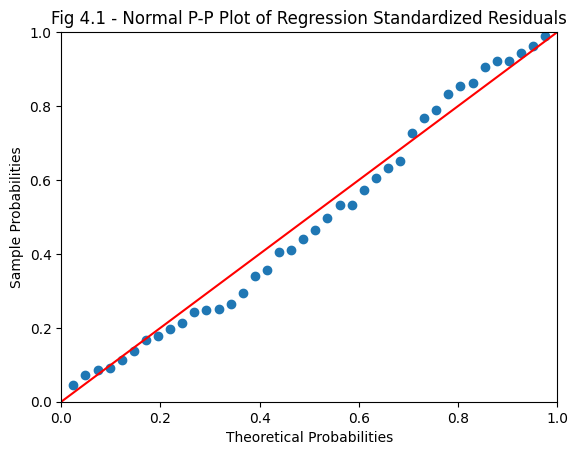

In [288]:
mba_salary_resid = mba_salary_lm.resid
#probplot = sm.ProbPlot( mba_salary_resid );

probplot = sm.ProbPlot( get_standardized_values( mba_salary_resid ) );
plt.figure( figsize = (8, 6) );
probplot.ppplot( line='45' );
plt.title( "Fig 4.1 - Normal P-P Plot of Regression Standardized Residuals" );
plt.show();

### 4.4.6 Outlier Analysis

#### 4.4.6.1 Z-Score

In [289]:
from scipy.stats import zscore

In [290]:
mba_salary_df['z_score_salary'] = zscore( mba_salary_df.Salary )

In [291]:
mba_salary_df[ (mba_salary_df.z_score_salary > 3.0) | (mba_salary_df.z_score_salary < -3.0) ]

,S. No.,Percentage in Grade 10,Salary,z_score_salary


#### 4.4.6.2 Cook's Distance

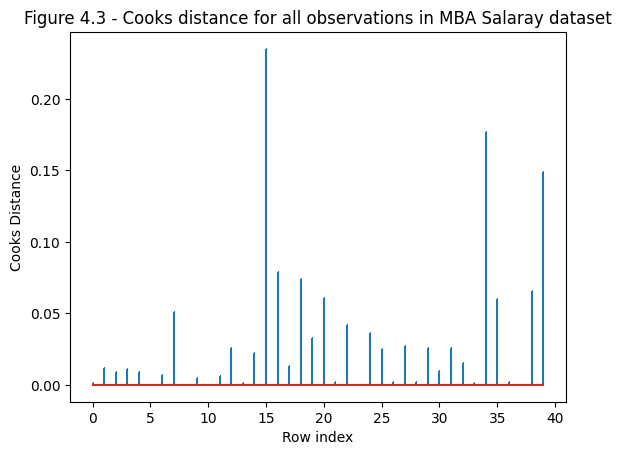

In [292]:
import numpy as np

mba_influence = mba_salary_lm.get_influence()
(c, p) = mba_influence.cooks_distance

plt.stem( np.arange( len( train_X) ), 
         np.round( c, 3 ), 
         markerfmt="," );
plt.title( "Figure 4.3 - Cooks distance for all observations in MBA Salaray dataset" );
plt.xlabel( "Row index")
plt.ylabel( "Cooks Distance");

#### 4.4.6.3 Leverage Values

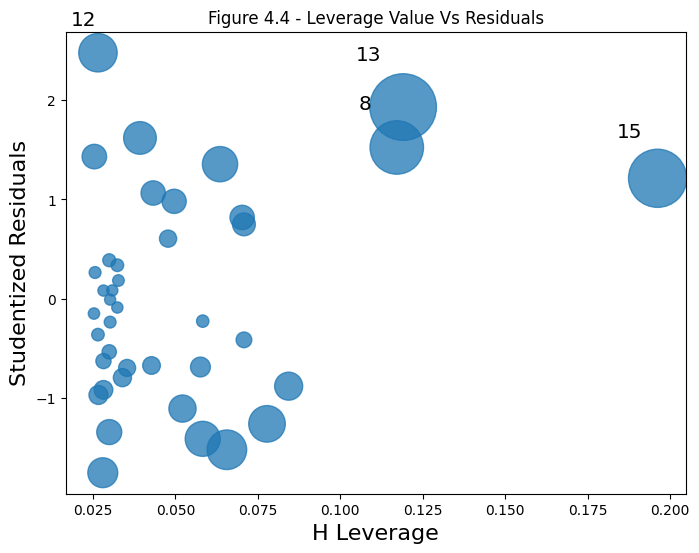

In [293]:
from statsmodels.graphics.regressionplots import influence_plot

fig, ax = plt.subplots( figsize=(8,6) )
influence_plot( mba_salary_lm, ax = ax, criterion = 'Cooks' )
plt.title( "Figure 4.4 - Leverage Value Vs Residuals")
plt.show();

### 4.4.7 Making prediction using the model

#### 4.4.7.1 Predicting on validation set 

In [294]:
pred_y = mba_salary_lm.predict( test_X )

#### 4.4.7.2 Finding R-Square and RMSE

In [295]:
from sklearn.metrics import r2_score, mean_squared_error

In [296]:
np.abs(r2_score(test_y, pred_y))

0.156645849742304

In [297]:
import numpy

In [298]:
np.sqrt(mean_squared_error(test_y, pred_y))

73458.04348346895

## 4.5 Multiple Linear Regression

#### 4.5.2.1 Loading the dataset

In [299]:
ipl_auction_df = pd.read_csv( 'https://raw.githubusercontent.com/manaranjanp/IIMBClasses/main/regression/IPL_IMB381IPL2013.csv' )

In [300]:
ipl_auction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sl.NO.         130 non-null    int64  
 1   PLAYER NAME    130 non-null    object 
 2   AGE            130 non-null    int64  
 3   COUNTRY        130 non-null    object 
 4   TEAM           130 non-null    object 
 5   PLAYING ROLE   130 non-null    object 
 6   T-RUNS         130 non-null    int64  
 7   T-WKTS         130 non-null    int64  
 8   ODI-RUNS-S     130 non-null    int64  
 9   ODI-SR-B       130 non-null    float64
 10  ODI-WKTS       130 non-null    int64  
 11  ODI-SR-BL      130 non-null    float64
 12  CAPTAINCY EXP  130 non-null    int64  
 13  RUNS-S         130 non-null    int64  
 14  HS             130 non-null    int64  
 15  AVE            130 non-null    float64
 16  SR-B           130 non-null    float64
 17  SIXERS         130 non-null    int64  
 18  RUNS-C    

In [301]:
ipl_auction_df.iloc[0:5, 0:10]

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B
0,1,"Abdulla, YA",2,SA,KXIP,Allrounder,0,0,0,0.00
1,2,Abdur Razzak,2,BAN,RCB,Bowler,214,18,657,71.41
2,3,"Agarkar, AB",2,IND,KKR,Bowler,571,58,1269,80.62
3,4,"Ashwin, R",1,IND,CSK,Bowler,284,31,241,84.56
4,5,"Badrinath, S",2,IND,CSK,Batsman,63,0,79,45.93


In [302]:
ipl_auction_df.iloc[0:5, 13:]

,RUNS-S,HS,AVE,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
0,0,0,0.00,0.00,0,307,15,20.47,8.90,13.93,2009,50000,50000
1,0,0,0.00,0.00,0,29,0,0.00,14.50,0.00,2008,50000,50000
2,167,39,18.56,121.01,5,1059,29,36.52,8.81,24.90,2008,200000,350000
3,58,11,5.80,76.32,0,1125,49,22.96,6.23,22.14,2011,100000,850000
4,1317,71,32.93,120.71,28,0,0,0.00,0.00,0.00,2011,100000,800000


In [303]:
X_features = ipl_auction_df.columns

In [304]:
X_features = ['AGE', 'COUNTRY', 'PLAYING ROLE',
              'T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 
              'ODI-WKTS', 'ODI-SR-BL', 'CAPTAINCY EXP', 'RUNS-S', 
              'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C', 'WKTS', 
              'AVE-BL', 'ECON', 'SR-BL']

### 4.5.3 Encoding Categorical Features

In [305]:
ipl_auction_df['PLAYING ROLE'].unique()

array(['Allrounder', 'Bowler', 'Batsman', 'W. Keeper'], dtype=object)

In [306]:
pd.get_dummies(ipl_auction_df['PLAYING ROLE'])[0:5]

,Allrounder,Batsman,Bowler,W. Keeper
0,1,0,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,1,0,0


In [307]:
categorical_features = ['AGE', 'COUNTRY', 'PLAYING ROLE', 'CAPTAINCY EXP']

In [308]:
ipl_auction_encoded_df = pd.get_dummies( ipl_auction_df[X_features], 
                                        columns = categorical_features,
                                        drop_first = True )

In [309]:
ipl_auction_encoded_df.columns

Index(['T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C', 'WKTS', 'AVE-BL',
       'ECON', 'SR-BL', 'AGE_2', 'AGE_3', 'COUNTRY_BAN', 'COUNTRY_ENG',
       'COUNTRY_IND', 'COUNTRY_NZ', 'COUNTRY_PAK', 'COUNTRY_SA', 'COUNTRY_SL',
       'COUNTRY_WI', 'COUNTRY_ZIM', 'PLAYING ROLE_Batsman',
       'PLAYING ROLE_Bowler', 'PLAYING ROLE_W. Keeper', 'CAPTAINCY EXP_1'],
      dtype='object')

In [333]:
X_features = ipl_auction_encoded_df.columns

In [400]:
X = sm.add_constant( ipl_auction_encoded_df )
Y = ipl_auction_df['SOLD PRICE']

train_X, test_X, train_y, test_y = train_test_split( X ,
                                                     Y,
                                                    train_size = 0.8,
                                                    random_state = 101 )

### 4.5.5 Building the model on training dataset

In [401]:
ipl_model_1 = sm.OLS(train_y, train_X).fit()
ipl_model_1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
=======================================================================================
Model:                      OLS                    Adj. R-squared:           0.408     
Dependent Variable:         SOLD PRICE             AIC:                      2575.8463 
Date:                       2023-05-22 09:48       BIC:                      2653.6829 
No. Observations:           91                     Log-Likelihood:           -1256.9   
Df Model:                   30                     F-statistic:              3.064     
Df Residuals:               60                     Prob (F-statistic):       0.000111  
R-squared:                  0.605                  Scale:                    8.8240e+10
---------------------------------------------------------------------------------------
                          Coef.       Std.Err.     t    P>|t|     [0.025       0.975]  
---------------------------------------------------------------------------------------
const                   221342.1867 218003.4840  1.0153 0.3140 -214729.7074 657414.0808
T-RUNS                      12.5770     33.6512  0.3737 0.7099     -54.7355     79.8896
T-WKTS                     172.8254    604.8745  0.2857 0.7761   -1037.1038   1382.7546
ODI-RUNS-S                  32.9014     35.9478  0.9153 0.3637     -39.0049    104.8076
ODI-SR-B                  1566.1666   1699.4912  0.9216 0.3605   -1833.3219   4965.6551
ODI-WKTS                   458.2471    802.4284  0.5711 0.5701   -1146.8488   2063.3430
ODI-SR-BL                -1625.1297   1679.6847 -0.9675 0.3372   -4984.9993   1734.7399
RUNS-S                     100.8180    177.4033  0.5683 0.5720    -254.0415    455.6775
HS                       -3277.9496   2937.1540 -1.1160 0.2689   -9153.1324   2597.2332
AVE                      10447.8894   6977.7698  1.4973 0.1396   -3509.7284  24405.5071
SR-B                     -1633.6100   1259.7460 -1.2968 0.1997   -4153.4771    886.2572
SIXERS                    3632.3450   3406.5380  1.0663 0.2906   -3181.7456  10446.4357
RUNS-C                     225.4529    284.7019  0.7919 0.4315    -344.0357    794.9415
WKTS                     -2681.8295   7457.8567 -0.3596 0.7204  -17599.7640  12236.1051
AVE-BL                    5738.9418  11072.5586  0.5183 0.6062  -16409.4730  27887.3566
ECON                      8626.8638  13476.6572  0.6401 0.5245  -18330.4642  35584.1919
SR-BL                    -9745.5222  15034.6422 -0.6482 0.5193  -39819.2841  20328.2398
AGE_2                   -13290.2948 131394.4633 -0.1011 0.9198 -276118.3536 249537.7639
AGE_3                  -276039.1239 177774.8772 -1.5527 0.1257 -631641.8234  79563.5757
COUNTRY_BAN                 -0.0000      0.0000 -1.5888 0.1174      -0.0000      0.0000
COUNTRY_ENG             479512.5896 224344.6095  2.1374 0.0367   30756.5560 928268.6231
COUNTRY_IND              76471.7760 119170.0616  0.6417 0.5235 -161903.8387 314847.3907
COUNTRY_NZ               63380.4915 180312.5505  0.3515 0.7264 -297298.3105 424059.2934
COUNTRY_PAK             -14435.2182 158062.1762 -0.0913 0.9275 -330606.6448 301736.2084
COUNTRY_SA              -89297.9026 143773.3488 -0.6211 0.5369 -376887.4188 198291.6137
COUNTRY_SL              -10680.7690 175356.2304 -0.0609 0.9516 -361445.4545 340083.9166
COUNTRY_WI             -387053.0874 201135.5001 -1.9243 0.0591 -789383.9901  15277.8152
COUNTRY_ZIM            -208465.2605 369944.8083 -0.5635 0.5752 -948465.0544 531534.5334
PLAYING ROLE_Batsman     86831.8641 136007.7819  0.6384 0.5256 -185224.2056 358887.9339
PLAYING ROLE_Bowler     114924.2702 113246.2348  1.0148 0.3143 -111601.9266 341450.4669
PLAYING ROLE_W. Keeper  -39721.4457 194651.6426 -0.2041 0.8390 -429082.7023 349639.8109
CAPTAINCY EXP_1         128273.4294 119681.9351  1.0718 0.2881 -111126.0845 367672.9433
---------------------------------------------------------------------------------------
Omnibus:           

### 4.5.6 Multi-Collinearity

#### 4.5.6.1 VIF

In [402]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif_factors( X ):
    X_matrix = X.to_numpy()
    vif = [ variance_inflation_factor( X_matrix, i ) for i in range( X_matrix.shape[1] ) ]
    vif_factors = pd.DataFrame()
    vif_factors['column'] = X.columns
    vif_factors['vif'] = vif
    
    return vif_factors

Now, calling the above method with the X features will return the VIF for the corresponding columns.

In [403]:
vif_factors = get_vif_factors( X[X_features] )
vif_factors

,column,vif
0,T-RUNS,12.612694
1,T-WKTS,7.679284
2,ODI-RUNS-S,16.426209
3,ODI-SR-B,13.829376
4,ODI-WKTS,9.951800
5,ODI-SR-BL,4.426818
6,RUNS-S,16.135407
7,HS,22.781017
8,AVE,25.226566
9,SR-B,21.576204


#### 4.5.6.2 Checking correlation of columns with large VIFs

In [404]:
columns_with_large_vif = vif_factors[vif_factors.vif > 4].column

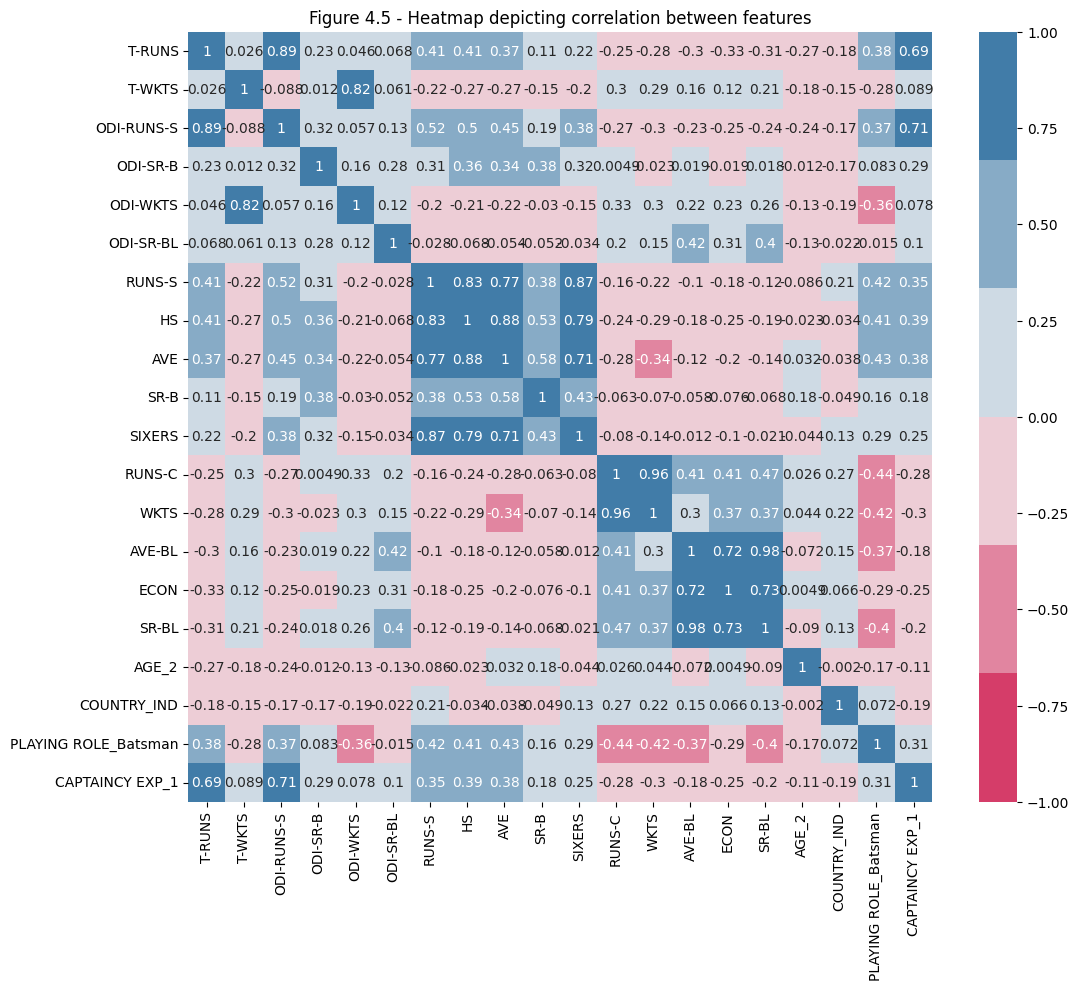

In [405]:
plt.figure( figsize = (12,10) )
sn.heatmap( X[columns_with_large_vif].corr(), 
           annot = True, 
           cmap = sn.diverging_palette(0, 240),
           vmin = -1.0,
           vmax = 1.0);
plt.title( "Figure 4.5 - Heatmap depicting correlation between features");

In [406]:
columns_to_be_removed = ['T-RUNS', 'T-WKTS', 'RUNS-S', 'HS', 
                         'AVE', 'RUNS-C', 'SR-B', 'AVE-BL', 
                         'ECON', 'ODI-SR-B', 'ODI-RUNS-S', 'AGE_2', 'SR-BL']

In [407]:
X_new_features = list( set(X_features) - set(columns_to_be_removed) )

In [408]:
get_vif_factors( X[X_new_features] )

,column,vif
0,COUNTRY_SL,1.519752
1,AGE_3,1.779861
2,COUNTRY_SA,1.416657
3,PLAYING ROLE_Bowler,3.060168
4,COUNTRY_IND,3.144668
5,CAPTAINCY EXP_1,2.458745
6,COUNTRY_WI,1.194093
7,SIXERS,2.397409
8,COUNTRY_NZ,1.173418
9,ODI-WKTS,2.742889


#### 4.5.6.3 Building a new model after removing multicollinearity

In [409]:
train_X = train_X[X_new_features]

ipl_model_2 = sm.OLS(train_y, train_X).fit()
ipl_model_2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
========================================================================================
Model:                      OLS                Adj. R-squared (uncentered):   0.778     
Dependent Variable:         SOLD PRICE         AIC:                           2573.0667 
Date:                       2023-05-22 09:48   BIC:                           2615.7513 
No. Observations:           91                 Log-Likelihood:                -1269.5   
Df Model:                   17                 F-statistic:                   19.71     
Df Residuals:               74                 Prob (F-statistic):            7.26e-21  
R-squared (uncentered):     0.819              Scale:                         9.4395e+10
----------------------------------------------------------------------------------------
                          Coef.       Std.Err.     t    P>|t|     [0.025       0.975]   
----------------------------------------------------------------------------------------
COUNTRY_SL               87692.1209 162055.4688  0.5411 0.5900 -235210.4493  410594.6911
AGE_3                  -141696.8693 103042.3578 -1.3751 0.1732 -347013.2491   63619.5104
COUNTRY_SA               88949.7804 121063.7118  0.7347 0.4648 -152274.9310  330174.4918
PLAYING ROLE_Bowler     100369.0350  95236.9184  1.0539 0.2954  -89394.6671  290132.7372
COUNTRY_IND             230687.4601  91118.8305  2.5317 0.0135   49129.2271  412245.6930
CAPTAINCY EXP_1         285520.5587  95142.8539  3.0010 0.0037   95944.2842  475096.8333
COUNTRY_WI             -204625.4759 155339.1905 -1.3173 0.1918 -514145.5694  104894.6177
SIXERS                    6455.9086   1694.0808  3.8109 0.0003    3080.3789    9831.4384
COUNTRY_NZ              152583.5338 151542.6784  1.0069 0.3173 -149371.8442  454538.9118
ODI-WKTS                   866.1497    376.2432  2.3021 0.0241     116.4687    1615.8307
ODI-SR-BL                  867.2644   1240.0260  0.6994 0.4865   -1603.5413    3338.0700
PLAYING ROLE_Batsman    166191.8789 101373.0446  1.6394 0.1054  -35798.3216  368182.0795
COUNTRY_ENG             630985.3042 197933.7481  3.1879 0.0021  236593.7020 1025376.9064
COUNTRY_ZIM            -216742.5100 355352.2292 -0.6099 0.5438 -924797.2826  491312.2627
WKTS                      2140.6689   1967.5317  1.0880 0.2801   -1779.7235    6061.0614
COUNTRY_PAK              53842.3701 134688.9367  0.3998 0.6905 -214531.1947  322215.9348
COUNTRY_BAN                  0.0000      0.0000     nan    nan       0.0000       0.0000
PLAYING ROLE_W. Keeper   18064.5487 144219.0711  0.1253 0.9007 -269298.2233  305427.3207
----------------------------------------------------------------------------------------
Omnibus:                       6.898               Durbin-Watson:                  2.004
Prob(Omnibus):                 0.032               Jarque-Bera (JB):               6.322
Skew:                          0.609               Prob(JB):                       0.042
Kurtosis:                      3.432               Condition No.:                  inf  
========================================================================================
* The condition number is large (inf). This might indicate             strong
multicollinearity or other numerical problems.
"""

In [424]:
significant_vars = ['COUNTRY_IND', 'COUNTRY_ENG', 'SIXERS', 'CAPTAINCY EXP_1', 'ODI-WKTS']

train_X = train_X[significant_vars]

ipl_model_3 = sm.OLS(train_y, train_X).fit()
ipl_model_3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.756     
Dependent Variable:     SOLD PRICE       AIC:                         3674.6681 
Date:                   2023-05-22 09:49 BIC:                         3689.0058 
No. Observations:       130              Log-Likelihood:              -1832.3   
Df Model:               5                F-statistic:                 81.45     
Df Residuals:           125              Prob (F-statistic):          1.22e-37  
R-squared (uncentered): 0.765            Scale:                       1.0647e+11
--------------------------------------------------------------------------------
                     Coef.      Std.Err.    t    P>|t|     [0.025      0.975]   
--------------------------------------------------------------------------------
COUNTRY_IND       371786.7955  51246.5419 7.2549 0.0000 270363.5289  473210.0622
COUNTRY_ENG       729993.1190 191788.3742 3.8062 0.0002 350420.1236 1109566.1143
SIXERS              7709.4990   1228.1588 6.2773 0.0000   5278.8203   10140.1778
CAPTAINCY EXP_1   267659.5375  62759.9201 4.2648 0.0000 143449.8664  391869.2085
ODI-WKTS            1165.5455    232.7771 5.0071 0.0000    704.8508    1626.2402
--------------------------------------------------------------------------------
Omnibus:                   5.648             Durbin-Watson:                1.941
Prob(Omnibus):             0.059             Jarque-Bera (JB):             5.121
Skew:                      0.438             Prob(JB):                     0.077
Kurtosis:                  3.423             Condition No.:                903  
================================================================================

"""

### 4.5.7 Residual Analysis

#### 4.5.7.2 Residual Plot

In [425]:
def plot_resid_fitted( fitted, resid, title):
    plt.scatter( get_standardized_values( fitted ), 
            get_standardized_values( resid ) )
    plt.title( title )
    plt.xlabel( "Standardized predicted values")
    plt.ylabel( "Standardized residual values")    
    plt.show()

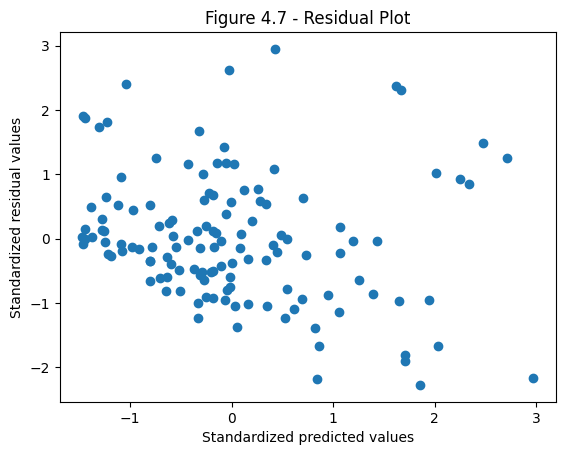

In [426]:
plot_resid_fitted( ipl_model_3.fittedvalues, 
                  ipl_model_3.resid,
                  "Figure 4.7 - Residual Plot")

<Figure size 800x600 with 0 Axes>

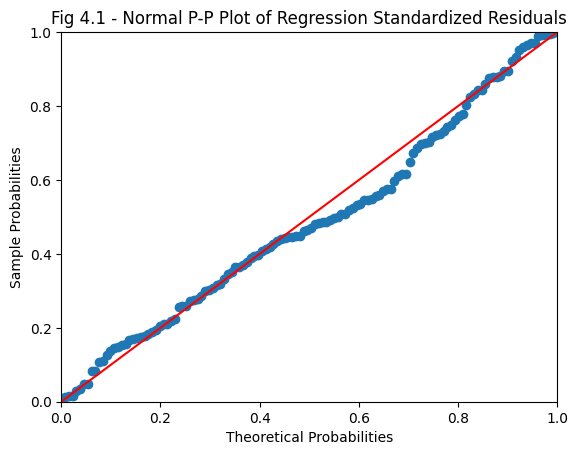

In [427]:
probplot = sm.ProbPlot( get_standardized_values(ipl_model_3.resid ) )
plt.figure( figsize = (8, 6) )
probplot.ppplot( line='45' )
plt.title( "Fig 4.1 - Normal P-P Plot of Regression Standardized Residuals" )
plt.show()

### 4.5.8 Detecting Influencers

In [428]:
k = train_X.shape[1]
n = train_X.shape[0]

In [429]:
print( "Number of variables:", k, " and number of observations:", n)

Number of variables: 5  and number of observations: 91


In [430]:
leverage_cutoff = 3*((k + 1)/n) 
print( "Cutoff for leverage value: ", round(leverage_cutoff, 3) )

Cutoff for leverage value:  0.198


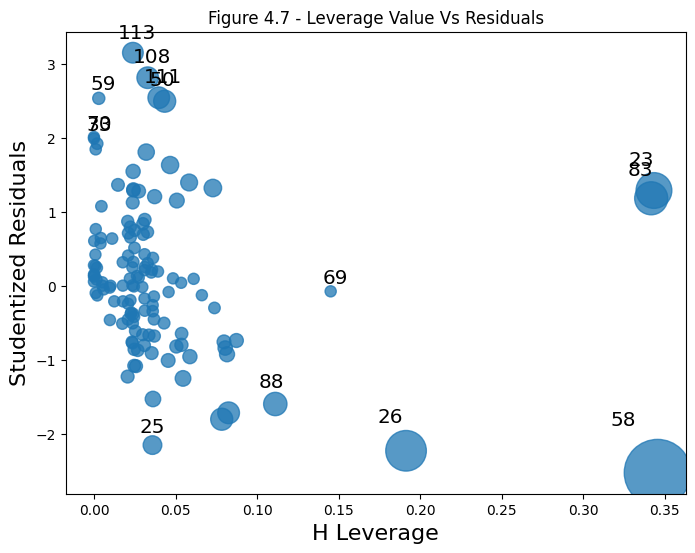

In [431]:
from statsmodels.graphics.regressionplots import influence_plot

fig, ax = plt.subplots( figsize=(8,6) )
influence_plot( ipl_model_3, ax = ax )
plt.title( "Figure 4.7 - Leverage Value Vs Residuals")
plt.show()

In [432]:
ipl_auction_df[ipl_auction_df.index.isin( [23, 58, 83] )]

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
23,24,"Flintoff, A",2,ENG,CSK,Allrounder,3845,226,3394,88.82,...,116.98,2,105,2,52.50,9.55,33.00,2009,950000,1550000
58,59,"Mascarenhas, AD",2,ENG,RR+,Allrounder,0,0,245,95.33,...,101.37,1,331,19,17.42,7.01,14.95,2011,100000,100000
83,84,"Pietersen, KP",2,ENG,RCB+,Batsman,6654,5,4184,86.76,...,141.20,30,215,7,30.71,7.41,24.86,2009,1350000,1550000


### 4.5.10 Making predictions on validation set

In [433]:
pred_y = ipl_model_3.predict( test_X[train_X.columns] )

#### Measuring RMSE

In [434]:
from sklearn import metrics

np.sqrt(metrics.mean_squared_error(pred_y, test_y))

352481.4917803945

#### Measuring R-squared value

In [435]:
np.round( metrics.r2_score(test_y, pred_y), 2 )

0.39